#### First import the necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Next load and examine the dataset


In [2]:

df1 = pd.read_csv('nhanes4.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Columns: 135 entries, seqn to group_1
dtypes: bool(5), float64(125), int64(1), object(4)
memory usage: 6.0+ MB


In [4]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

df1.dtypes

seqn                       float64
age                        float64
gender                     float64
ethnicity                   object
lang_hisp                   object
lang_nhb_nhw                object
lang_asian                  object
bmi                        float64
depr1                      float64
depr2                      float64
depr3                      float64
depr4                      float64
depr5                      float64
depr6                      float64
depr7                      float64
depr8                      float64
depr9                      float64
depr10                     float64
bodyfatpct                 float64
foodsec                    float64
diabetes                   float64
prediabetes                float64
asthma                     float64
arthritis                  float64
gout                       float64
chf                        float64
chd                        float64
angina                     float64
mi                  

In [5]:
#viewing categories of columns with 'object' dtypes

print(f'ethnicity: \n{df1.ethnicity.value_counts()}\n')
print(f'language - non-hispanic black or white: \n{df1.lang_nhb_nhw.value_counts()}\n')
print(f'language - hispanic: \n{df1.lang_hisp.value_counts()}\n')
print(f'language - asian: \n{df1.lang_asian.value_counts()}\n')


ethnicity: 
white                        1914
black                        1265
mexican                      1064
other_hisp                    798
asian                         726
other_race_or_multiracial     225
Name: ethnicity, dtype: int64

language - non-hispanic black or white: 
english    3293
Name: lang_nhb_nhw, dtype: int64

language - hispanic: 
spanish_only          687
more_span_than_eng    301
both_equally          294
english_only          286
more_eng_than_span    283
Name: lang_hisp, dtype: int64

language - asian: 
non-english_only        361
english_only            149
more_eng_than_noneng     77
more_noneng_than_eng     74
both_equally             62
Name: lang_asian, dtype: int64



In [6]:
# Create dummy variables for ethnicity column, which is currently a categorical 'object' column
from sklearn.preprocessing import OneHotEncoder
dummies = pd.get_dummies(df1['ethnicity'])
dummies

,asian,black,mexican,other_hisp,other_race_or_multiracial,white
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,1,0,0,0,0
...,...,...,...,...,...,...
5987,0,0,0,0,0,1
5988,0,0,0,0,0,1
5989,0,0,0,0,0,1
5990,0,0,0,0,0,1


In [7]:
# merging the dummy variable columns into the dataset and saving as new dataframe (df2)
df2 = pd.concat([df1, dummies], axis=1)


In [8]:
df2.count()


seqn                         5992
age                          5992
gender                       5992
ethnicity                    5992
lang_hisp                    1851
lang_nhb_nhw                 3293
lang_asian                    723
bmi                          5662
depr1                        5164
depr2                        5164
depr3                        5164
depr4                        5162
depr5                        5162
depr6                        5162
depr7                        5161
depr8                        5161
depr9                        5161
depr10                       3579
bodyfatpct                   3012
foodsec                      5766
diabetes                     5988
prediabetes                  5005
asthma                       5987
arthritis                    5708
gout                         5711
chf                          5708
chd                          5693
angina                       5701
mi                           5710
cva           

#### Preparing the dataset to apply machine learning models. We will remove features that have less than 20 datapoints in order to reduce the number of dimensions and reduce likelihood of overfitting.

In [9]:
#creating a new dataframe

df3 = df2.drop(['ethnicity', 'white', 'ethnicity', 'tchol','fglucose', 'jaundice_age', 'ca_bladder_age','ca_testicular_age','ca_blood_age',\
              'ca_thyroid_age','ca_bone_age','ca_uterine_age','ca_brain_age','ca_breast_age','ca_cervical_age',\
              'ca_colon_age','ca_esophageal_age','ca_gallbladder_age','ca_kidney_age','ca_larynx_age','ca_leukemia_age',\
              'ca_liver_age','ca_lung_age','ca_hodgkins_age','ca_melanoma_age','ca_mouth_age','ca_nervous_age',\
              'ca_ovarian_age', 'ca_pancreatic_age','ca_rectal_age','ca_skin_nonmelanoma_age','ca_skin_unknown_age',\
              'ca_softtissue_age','ca_stomach_age', 'lang_hisp', 'lang_nhb_nhw', 'lang_asian', 'depr1','depr2','depr3',\
                     'depr4','depr5','depr6','depr7','depr8','depr9','depr10'], axis=1)

In [10]:
df3.columns

Index(['seqn', 'age', 'gender', 'bmi', 'bodyfatpct', 'foodsec', 'diabetes',
       'prediabetes', 'asthma', 'arthritis', 'gout', 'chf', 'chd', 'angina',
       'mi', 'cva', 'emphysema', 'thyroid', 'bronchitis', 'liver', 'copd',
       'jaundice', 'cancer', 'kidney', 'asthma_age', 'arthritis_age',
       'gout_age', 'diabetes_age', 'chf_age', 'chd_age', 'angina_age',
       'mi_age', 'cva_age', 'emphysema_age', 'thyroid_age', 'bronchitis_age',
       'liver_age', 'ca_prostate_age', 'numhosp', 'hdl', 'tg', 'ldl', 'hgba1c',
       'wbc', 'lymphocytes', 'monocytes', 'neutrophils', 'eosinophil',
       'basophils', 'rbc', 'hgb', 'hct', 'mcv', 'mch', 'mchgb', 'rdw', 'plt',
       'mpv', 'alb', 'alp', 'ast', 'alt', 'bun', 'bicarbonate', 'calcium',
       'cholesterol', 'cpk', 'chlorine', 'creatinine', 'globulin', 'glucose',
       'ggt', 'iron', 'potassium', 'ldh', 'sodium', 'osmolality', 'phosphorus',
       'tbili', 'protein', 'triglycerides', 'uricacid', 'depr_score',
       'cvd_onset_age

#### Reducing the number of datapoints to only those study participants who had >=1 hospital admission.

In [11]:
df3 = df3[df3['numhosp']>0]
df3.dtypes

seqn                         float64
age                          float64
gender                       float64
bmi                          float64
bodyfatpct                   float64
foodsec                      float64
diabetes                     float64
prediabetes                  float64
asthma                       float64
arthritis                    float64
gout                         float64
chf                          float64
chd                          float64
angina                       float64
mi                           float64
cva                          float64
emphysema                    float64
thyroid                      float64
bronchitis                   float64
liver                        float64
copd                         float64
jaundice                     float64
cancer                       float64
kidney                       float64
asthma_age                   float64
arthritis_age                float64
gout_age                     float64
d

In [12]:
df3.count()

seqn                         670
age                          670
gender                       670
bmi                          623
bodyfatpct                   224
foodsec                      644
diabetes                     669
prediabetes                  495
asthma                       670
arthritis                    654
gout                         653
chf                          652
chd                          651
angina                       652
mi                           652
cva                          652
emphysema                    652
thyroid                      652
bronchitis                   648
liver                        650
copd                         652
jaundice                     670
cancer                       652
kidney                       652
asthma_age                   152
arthritis_age                250
gout_age                      55
diabetes_age                 164
chf_age                       76
chd_age                       70
angina_age

In [13]:
# Creating an updated dataset that does not include redundant features.
df4 = df3.drop(['numhosp', 'numhosp_new', 'group_0', 'group_1'], axis='columns')
df4.head()

,seqn,age,gender,bmi,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,ca_prostate_age,hdl,tg,ldl,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,cvd_onset_age,new_cvd,readmission,new_chf,asian,black,mexican,other_hisp,other_race_or_multiracial
9,83744.0,56.0,0.0,33.6,30.5,1.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,20.0,53.0,53.0,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,7.6,6.1,31.7,8.3,57.6,1.7,0.8,4.60,13.9,42.1,91.5,30.2,33.0,12.3,146.0,10.3,4.0,74.0,47.0,63.0,19.0,26.0,9.5,144.0,164.0,104.0,1.37,2.9,184.0,70.0,137.0,4.50,104.0,140.0,286.0,4.1,0.4,6.9,121.0,4.8,NaN,53.0,False,True,False,0,1,0,0,0
15,83757.0,57.0,1.0,35.4,41.4,2.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,45.0,50.0,32.0,50.0,50.0,NaN,NaN,53.0,42.0,39.0,NaN,NaN,NaN,43.0,137.0,157.0,13.0,6.7,26.9,8.4,61.7,2.4,0.8,4.65,13.6,40.3,86.6,29.1,33.6,13.4,256.0,7.6,4.2,87.0,13.0,15.0,21.0,26.0,9.7,233.0,67.0,101.0,0.57,3.1,383.0,20.0,93.0,4.91,151.0,139.0,296.0,4.2,0.5,7.3,161.0,4.2,9.0,50.0,False,True,False,0,0,0,1,0
37,83802.0,29.0,1.0,23.7,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN,5.2,7.5,38.4,7.8,50.3,3.2,0.4,4.21,13.1,37.8,89.7,31.1,34.7,12.8,260.0,8.9,4.9,90.0,20.0,14.0,15.0,23.0,9.2,203.0,109.0,101.0,0.61,3.2,94.0,14.0,54.0,3.89,122.0,137.0,274.0,4.3,0.5,8.1,59.0,5.4,NaN,NaN,False,False,False,0,0,1,0,0
44,83818.0,80.0,1.0,28.5,NaN,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,139.0,40.0,6.1,7.2,40.5,9.1,47.6,2.2,0.7,4.07,12.8,38.3,94.2,31.6,33.5,13.2,224.0,7.6,4.0,62.0,27.0,20.0,23.0,27.0,9.2,102.0,70.0,105.0,1.29,2.7,119.0,14.0,71.0,3.66,143.0,142.0,287.0,3.5,0.6,6.7,148.0,4.3,2.0,NaN,False,False,False,0,0,0,1,0
57,83843.0,80.0,0.0,24.2,NaN,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,8.5,19.7,9.0,67.7,2.9,0.8,4.14,13.8,39.9,96.3,33.3,34.6,14.6,213.0,6.3,4.4,NaN,NaN,NaN,15.0,28.0,9.5,NaN,NaN,96.0,1.04,2.7,93.0,NaN,NaN,3.64,134.0,133.0,267.0,3.5,NaN,7.1,16.0,NaN,2.0,NaN,False,False,False,0,0,0,0,0


In [14]:
#Replace null values with the mean of that column to allow models to function.

df4 = df4.fillna(df4.mean())
df4.count()

seqn                         670
age                          670
gender                       670
bmi                          670
bodyfatpct                   670
foodsec                      670
diabetes                     670
prediabetes                  670
asthma                       670
arthritis                    670
gout                         670
chf                          670
chd                          670
angina                       670
mi                           670
cva                          670
emphysema                    670
thyroid                      670
bronchitis                   670
liver                        670
copd                         670
jaundice                     670
cancer                       670
kidney                       670
asthma_age                   670
arthritis_age                670
gout_age                     670
diabetes_age                 670
chf_age                      670
chd_age                      670
angina_age

In [15]:
# Preparing data further for ML model fitting, separating target variable from features

X = df4.drop(['readmission', 'seqn'], axis='columns') #feature columns
y = df4.readmission #target variable
X.head(20)

,age,gender,bmi,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,ca_prostate_age,hdl,tg,ldl,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,cvd_onset_age,new_cvd,new_chf,asian,black,mexican,other_hisp,other_race_or_multiracial
9,56.0,0.0,33.600000,30.500000,1.000000,1.0,0.113131,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.203947,49.764,20.000000,53.000000,53.000000,58.842857,51.361111,53.000000,60.684211,52.175,48.553191,40.25,47.395833,63.967742,52.000000,121.467811,104.903509,7.600000,6.100000,31.700000,8.300000,57.600000,1.700000,0.800000,4.600000,13.900000,42.100000,91.500000,30.200000,33.000000,12.300000,146.00000,10.300000,4.00000,74.00000,47.000000,63.000000,19.000000,26.000000,9.500000,144.0000,164.000000,104.000000,1.370000,2.900000,184.000000,70.000000,137.000000,4.500000,104.000000,140.000000,286.000000,4.100000,0.400000,6.900000,121.000000,4.800000,6.445946,53.000000,False,False,0,1,0,0,0
15,57.0,1.0,35.400000,41.400000,2.000000,1.0,0.113131,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26.203947,45.000,50.000000,32.000000,50.000000,50.000000,51.361111,58.890411,53.000000,42.000,39.000000,40.25,47.395833,63.967742,43.000000,137.000000,157.000000,13.000000,6.700000,26.900000,8.400000,61.700000,2.400000,0.800000,4.650000,13.600000,40.300000,86.600000,29.100000,33.600000,13.400000,256.00000,7.600000,4.20000,87.00000,13.000000,15.000000,21.000000,26.000000,9.700000,233.0000,67.000000,101.000000,0.570000,3.100000,383.000000,20.000000,93.000000,4.910000,151.000000,139.000000,296.000000,4.200000,0.500000,7.300000,161.000000,4.200000,9.000000,50.000000,False,False,0,0,0,1,0
37,29.0,1.0,23.700000,35.882589,2.568323,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.203947,49.764,50.763636,50.579268,59.947368,58.842857,51.361111,58.890411,60.684211,52.175,48.553191,40.25,47.395833,63.967742,71.000000,121.467811,104.903509,5.200000,7.500000,38.400000,7.800000,50.300000,3.200000,0.400000,4.210000,13.100000,37.800000,89.700000,31.100000,34.700000,12.800000,260.00000,8.900000,4.90000,90.00000,20.000000,14.000000,15.000000,23.000000,9.200000,203.0000,109.000000,101.000000,0.610000,3.200000,94.000000,14.000000,54.000000,3.890000,122.000000,137.000000,274.000000,4.300000,0.500000,8.100000,59.000000,5.400000,6.445946,57.754286,False,False,0,0,1,0,0
44,80.0,1.0,28.500000,35.882589,3.000000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.203947,71.000,50.763636,50.579268,59.947368,58.842857,51.361111,58.890411,60.684211,52.175,48.553191,40.25,47.395833,63.967742,40.000000,139.000000,40.000000,6.100000,7.200000,40.500000,9.100000,47.600000,2.200000,0.700000,4.070000,12.800000,38.300000,94.200000,31.600000,33.500000,13.200000,224.00000,7.600000,4.00000,62.00000,27.000000,20.000000,23.000000,27.000000,9.200000,102.0000,70.000000,105.000000,1.290000,2.700000,119.000000,14.000000,71.000000,3.660000,143.000000,142.000000,287.000000,3.500000,0.600000,6.700000,148.000000,4.300000,2.000000,57.754286,False,False,0,0,0,1,0
57,80.0,0.0,24.200000,35.882589,3.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.203947,80.000,50.763636,50.579268,59.947368,58.842857,51.361111,58.890411,60.684211,52.175,48.553191,40.25,47.395833,63.967742,53.789562,121.467811,104.903509,5.000000,8.500000,19.700000,9.000000,67.700000,2.900000,0.800000,4.140000,13.800000,39.900000,96.300000,33.300000,34.600000,14.600000,213.00000,6.300000,4.40000,77.35533,26.

In [16]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle=True, random_state=42)




In [17]:
#first we can apply simple linear regression to the data
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
lr_clf.score(X_test, y_test)


-0.2673692236485836

#### Based on its accuracy score (-0.267), linear regression is a poor model for this dataset.

#### Since some algorithms require data to be scaled prior to use, we will normalize the training and test data:


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Next train and test a variety of models to determine the best fitting model to our dataset.

In [19]:
from sklearn.linear_model import LogisticRegression

clf_logreg = LogisticRegression()
clf_logreg.fit(X_train_scaled, y_train)

C:\Users\caras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
clf_logreg.score(X_test_scaled, y_test)

0.681592039800995

#### The logistic regression score is 68%. Logistic regression model fits our data much better compared with linear regression.

#### We will try now to reduce the number of features to include in our model.

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [38]:
bestfeatures = SelectKBest(score_func = chi2, k=10)
fit = bestfeatures.fit(X_train_scaled,y_train)

In [39]:
df_scores = pd.DataFrame(fit.scores_) #calculates score of each feature with respect to chi square test value
df_columns = pd.DataFrame(X.columns)

In [40]:
#concat two dataframes for better visualization
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Specs', 'Score'] #naming the dataframe columns

In [41]:
feature_scores.nlargest(20, 'Score') #highest score is best correlation of output

,Specs,Score
8,chf,15.047947
3,kidney,7.049526
4,copd,5.891405
9,gout,5.107372
2,cancer,4.607198
10,new_chf,4.599658
7,chd,4.087843
6,mi,3.838488
5,liver,2.744745
1,depr_score,0.923508


In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_scaled,y_train)

C:\Users\caras\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [27]:
print(model.feature_importances_) #use inbuilt feature_importances_ of tree based classifiers

[0.00967204 0.01074759 0.01327887 0.00864611 0.02154851 0.00838465
 0.0171472  0.01481568 0.01098557 0.00546875 0.01608331 0.01274074
 0.00411847 0.00424564 0.0055893  0.00380093 0.01160256 0.00810582
 0.01233286 0.01516884 0.00224603 0.01609103 0.00983963 0.01256015
 0.00960903 0.00613859 0.01195953 0.01489121 0.007945   0.00215269
 0.00451667 0.0055536  0.00587594 0.01315105 0.00603363 0.0088632
 0.00059991 0.01012203 0.01191734 0.00317327 0.01645245 0.00800308
 0.01530707 0.01074374 0.02253216 0.01498033 0.01636474 0.01012537
 0.01126856 0.01124753 0.01903069 0.0224796  0.00815621 0.01195852
 0.0110639  0.01504559 0.01676078 0.01488935 0.01479092 0.01538731
 0.01387206 0.00582536 0.02014321 0.0089683  0.01158409 0.01711685
 0.01180533 0.02029049 0.01142487 0.00531677 0.01035103 0.01738533
 0.01922035 0.01183308 0.01051972 0.01853389 0.01903918 0.0074983
 0.00813803 0.0121824  0.01497489 0.00822719 0.00126305 0.00476572
 0.01060982 0.0082538  0.00768313 0.00902641 0.00983649]


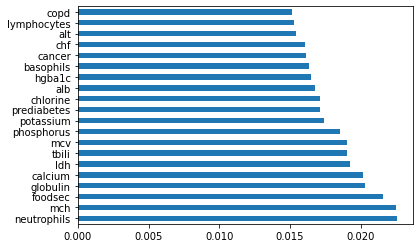

In [28]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [29]:
# moving readmission column to end of the dataset for ease of use for correlation matrix
df_temp = df4.pop('readmission')
df4['readmission'] = df_temp

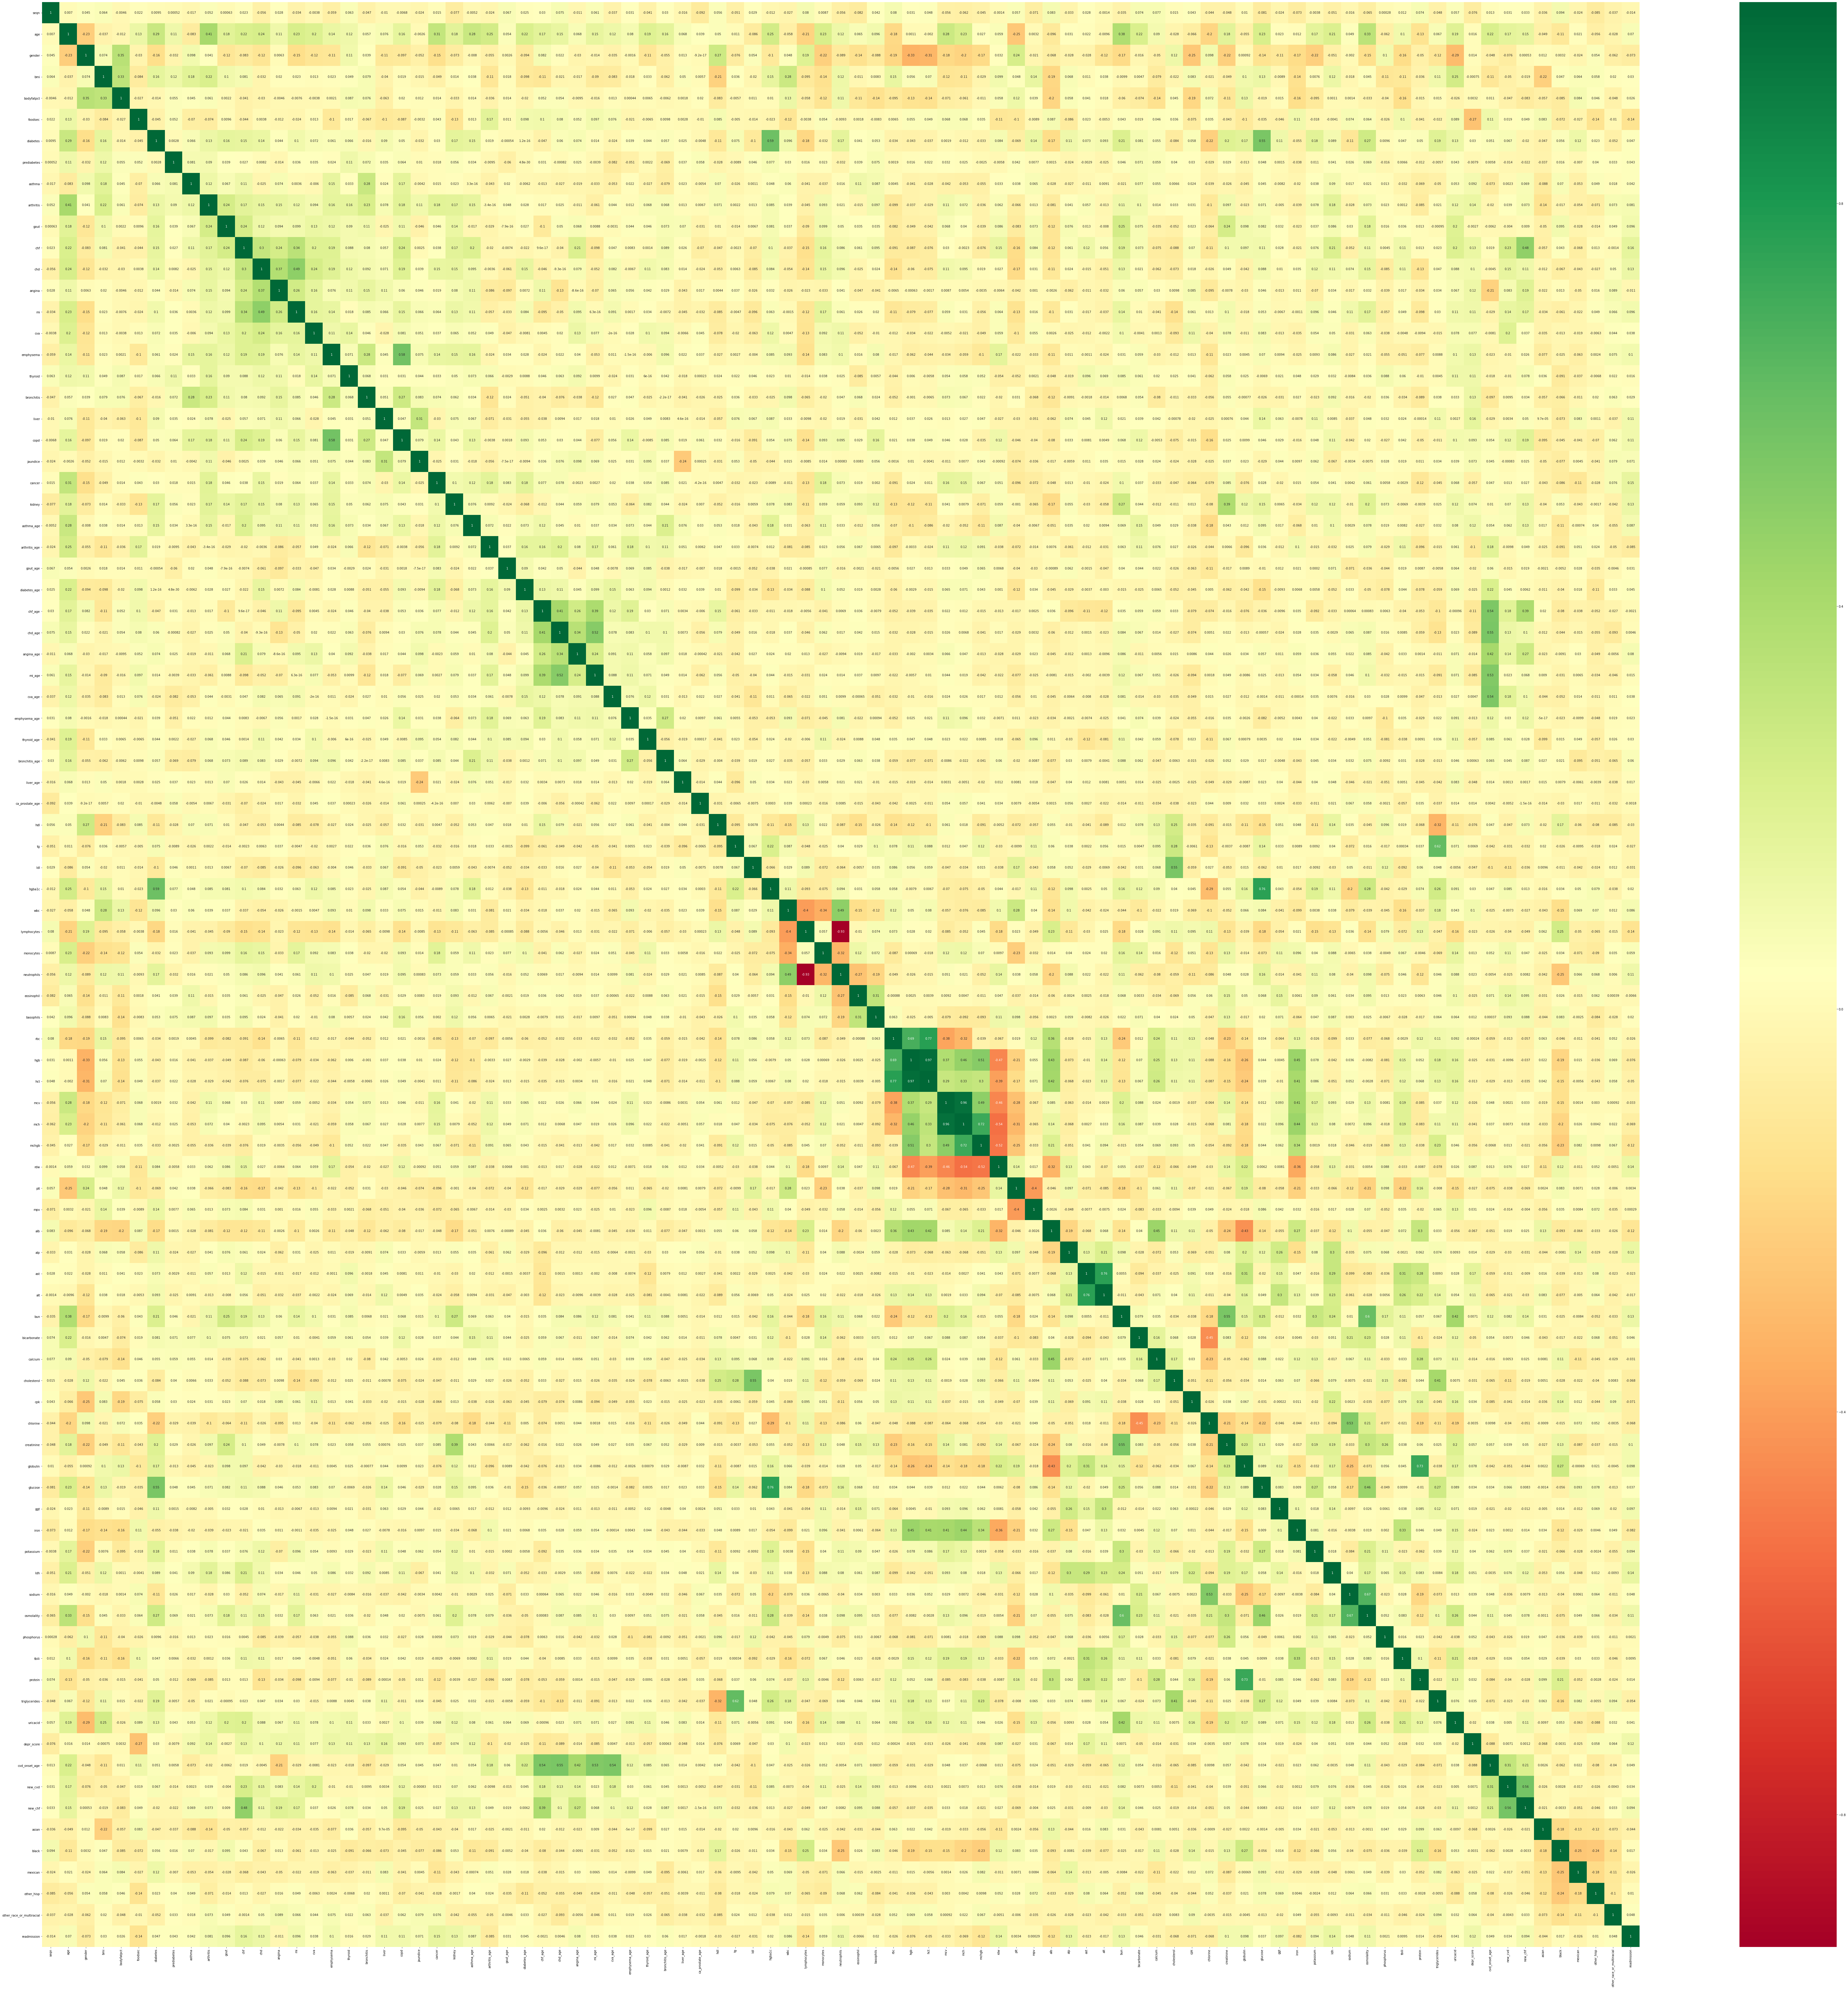

In [30]:

#correlation matrix heatmap

import seaborn as sns

corrmat = df4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(120,120))
#plot heat map
g=sns.heatmap(df4[top_corr_features].corr(), annot=True, cmap='RdYlGn')

#### Based on all of the above analyses, we will include the following features in our ML model:
'foodsec', 'depr_score', 'cancer', 'kidney', 'copd', 'liver','mi','chd', 'chf', 'gout', 'new_chf','osmolality', 'potassium', 'ggt', 'creatinine', 'bun', 'alp', 'rdw', 'neutrophils', 'wbc'


In [31]:
df5 = df4.filter(['readmission','foodsec', 'depr_score', 'cancer', 'kidney', 'copd', 'liver','mi','chd', 'chf', 'gout', 'new_chf','osmolality', 'potassium','mchgb', 'alb', 'ggt', 'creatinine', 'bun', 'alp', 'rdw', 'neutrophils', 'wbc'], axis=1)
df5.head()

,readmission,foodsec,depr_score,cancer,kidney,copd,liver,mi,chd,chf,gout,new_chf,osmolality,potassium,mchgb,alb,ggt,creatinine,bun,alp,rdw,neutrophils,wbc
9,True,1.000000,6.445946,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,False,286.0,4.50,33.0,4.0,70.000000,1.37,19.0,74.00000,12.3,57.6,6.1
15,True,2.000000,9.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,False,296.0,4.91,33.6,4.2,20.000000,0.57,21.0,87.00000,13.4,61.7,6.7
37,False,2.568323,6.445946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,274.0,3.89,34.7,4.9,14.000000,0.61,15.0,90.00000,12.8,50.3,7.5
44,False,3.000000,2.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,287.0,3.66,33.5,4.0,14.000000,1.29,23.0,62.00000,13.2,47.6,7.2
57,False,3.000000,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,267.0,3.64,34.6,4.4,33.798986,1.04,15.0,77.35533,14.6,67.7,8.5


#### Next we will perform machine learning to fit a model based on the abridged dataset.


In [42]:
# Preparing data further for ML model fitting, separating target variable from features

X = df5.drop(['readmission'], axis='columns') #feature columns
y = df5.readmission #target variable
X.head(20)

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle=True, random_state=0)




#first we can apply simple linear regression to the data
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
lr_clf.score(X_test, y_test)


0.08501342854197735

#### Linear regression still does not fit this dataset well, but it's score improved from -27% to 8%.

#### Since some algorithms require data to be scaled prior to use, we will normalize the training and test data:


In [43]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Next train and test a variety of models to determine the best fitting model to our dataset.

In [44]:
from sklearn.linear_model import LogisticRegression

clf_logreg = LogisticRegression()
clf_logreg.fit(X_train_scaled, y_train)

C:\Users\caras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
clf_logreg.score(X_test_scaled, y_test)

0.736318407960199

#### Feature selection improved the logistic regression score to 74% from the dataset with reduced features  vs 68% for dataset. including all features.

To check how the logistic regression model will generalize, perform k-fold crossvalidation.
    
    

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
#ShuffleSplit will randomize our samples so that each fold has equal distribution of the data samples.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LogisticRegression(), X, y, cv=cv)

C:\Users\caras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.71641791, 0.7238806 , 0.71641791, 0.67910448, 0.70149254])

#### The majority of the time the cross validation scores for the logistic regression model are coming out at/above 70%.

#### Next we will fit a random forest model.

In [54]:
# (from Titanic Random Forest)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)

param_grid = { "criterion"   : ["gini", "entropy"],
             "min_samples_leaf" : [1, 5, 10],
             "min_samples_split" : [2, 4, 10, 12, 16],
             "n_estimators": [20, 50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1)

gs = gs.fit(df5.iloc[:, 1:], df5.iloc[:, 0])

In [55]:
print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.7238805970149254
{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 50}


In [56]:
rf = RandomForestClassifier(criterion= 'entropy', 
                            min_samples_leaf= 5, 
                            min_samples_split= 12, 
                            n_estimators= 50, 
                            max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train_scaled, y_train)
print("%.4f" % rf.oob_score_)


0.6716


In [52]:
rf.predict(X_test_scaled)

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [57]:
rf.score(X_test_scaled, y_test)

0.7263681592039801

In [58]:
# Variable importance according to the random forest model.
pd.concat((pd.DataFrame(df5.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:30]

,variable,importance
13,mchgb,0.086751
15,ggt,0.080015
17,bun,0.079995
16,creatinine,0.074765
18,alp,0.074110
21,wbc,0.073503
1,depr_score,0.073472
12,potassium,0.070912
20,neutrophils,0.067755
19,rdw,0.065474
